# Desafio 05 - Evaluating the best model

In [4]:
import pandas as pd
import numpy as np

# show all available columns
pd.set_option('display.max_columns', 500)
# show all available rows
pd.set_option('display.max_rows', 500)

# Data Prep
from feature_engine.categorical_encoders import CountFrequencyCategoricalEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from category_encoders import TargetEncoder

# import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# Validation
from sklearn.model_selection import learning_curve, KFold, LeaveOneOut, cross_validate, validation_curve

# models
import statsmodels.formula.api as smf
import statsmodels.api as sm

# regression metrics
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report, f1_score, fbeta_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import auc, precision_recall_curve, log_loss, recall_score, precision_score, make_scorer
from sklearn.model_selection import cross_val_score

# confusion matrix  
from sklearn.model_selection import cross_val_predict, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, log_loss, make_scorer


# general and individual result analysis
import shap
from sklearn import preprocessing

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# warnig treatments
import warnings
warnings.filterwarnings('ignore')

# Loading and dividing DataFrame

In [5]:
# Loading dataframe
PATH = 'D:\DataScience\Python\Jupyter\Desafio05\Data\Processed'
FILE = '\Default_Credit_Card_processed_toModel.csv'

df_credit_card = pd.read_csv(PATH + FILE)

# Defining Target constraint
TARGET = 'Default'

# Sharing training and testing data
df_train, df_test = train_test_split(df_credit_card, stratify=df_credit_card[TARGET], test_size=0.2, random_state=42)

# Isolating target variable
X_train = df_train.drop(TARGET, axis=1)
y_train = df_train[TARGET]

X_test = df_test.drop(TARGET, axis=1)
y_test = df_test[TARGET]

# Data Preparation

In [6]:
# loading objects X_Train
X_train['SEX'] = X_train['SEX'].astype('object')
X_train['MARRIAGE'] = X_train['MARRIAGE'].astype('object')
X_train['EDUCATION'] = X_train['EDUCATION'].astype('object')
X_train['PAY_0'] = X_train['PAY_0'].astype('object')
X_train['PAY_2'] = X_train['PAY_2'].astype('object')
X_train['PAY_3'] = X_train['PAY_3'].astype('object')
X_train['PAY_4'] = X_train['PAY_4'].astype('object')
X_train['PAY_5'] = X_train['PAY_5'].astype('object')
X_train['PAY_6'] = X_train['PAY_6'].astype('object')

# loading objects X_test
X_test['SEX'] = X_test['SEX'].astype('object')
X_test['MARRIAGE'] = X_test['MARRIAGE'].astype('object')
X_test['EDUCATION'] = X_test['EDUCATION'].astype('object')
X_test['PAY_0'] = X_test['PAY_0'].astype('object')
X_test['PAY_2'] = X_test['PAY_2'].astype('object')
X_test['PAY_3'] = X_test['PAY_3'].astype('object')
X_test['PAY_4'] = X_test['PAY_4'].astype('object')
X_test['PAY_5'] = X_test['PAY_5'].astype('object')
X_test['PAY_6'] = X_test['PAY_5'].astype('object')

# Defining pipes
vars_minmax = ['AGE']
vars_encs = ['SEX', 'MARRIAGE']
vars_cats = ['EDUCATION']
vars_targ = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
vars_stds = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
             'PAY_AMT5', 'PAY_AMT6', 'score']

# Charging pipelines
pipe_num_min_max = ('min_max_scaler', MinMaxScaler(), vars_minmax)
pipe_cat_one_hot = ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), vars_encs)
pipe_cat_ordinal = ('ordinal_encoder', OrdinalEncoder(), vars_cats)
pipe_cat_target = ('target_encoder', TargetEncoder(), vars_targ)
pipe_num_stds = ('standard_scaler', StandardScaler(), vars_stds)

# Elaborating transformer flow 
transformers = [pipe_num_min_max,
                pipe_cat_one_hot,
                pipe_cat_ordinal,
                pipe_cat_target,
                pipe_num_stds]
pre_processador = ColumnTransformer(transformers)

# Running the best model optimized

In [7]:
# best parameters measured by modellng
rf_best = Pipeline(steps=[('pre_processor', pre_processador),
                          ('model', RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=4, 
                                                            n_estimators=300, random_state=123) )])


# training with the best parameters
rf_best.fit(X_train, y_train)

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('min_max_scaler',
                                                  MinMaxScaler(), ['AGE']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SEX', 'MARRIAGE']),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder(),
                                                  ['EDUCATION']),
                                                 ('target_encoder',
                                                  TargetEncoder(),
                                                  ['PAY_0', 'PAY_2', 'PAY_3',
                                                   'PAY_4', 'PAY_5', 'PAY_6']),
                                                 ('standard_scaler',
                          

# Feature Importance

In [8]:
# ratio of the variables used in the model
rf_best['model'].feature_importances_

array([0.02829971, 0.00350513, 0.00371445, 0.00353973, 0.00318939,
       0.00076544, 0.00877723, 0.24455123, 0.10037465, 0.06226566,
       0.04370533, 0.03885254, 0.02523473, 0.04409201, 0.04258832,
       0.03644349, 0.03248476, 0.0318713 , 0.04106504, 0.03928321,
       0.03683066, 0.03147442, 0.02794323, 0.03056099, 0.03858735])

In [9]:
# Loading features
features =  ['AGE', 'SEX_1', 'SEX_2', 'MARRIAGE', 'EDUCATION_2', 'EDUCATION_1', 'EDUCATION_3', 'EDUCATION_4'
             'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'LIMIT_BAL', 
             'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
             'score']

# showing from the greatest feature used to smallest one
importances = pd.DataFrame({'features':features, 'importance':rf_best['model'].feature_importances_})
importances = importances.sort_values('importance', ascending=False).set_index('features')
importances

,importance
features,
EDUCATION_4PAY_0,0.244551
PAY_2,0.100375
PAY_3,0.062266
LIMIT_BAL,0.044092
PAY_4,0.043705
BILL_AMT1,0.042588
PAY_AMT1,0.041065
PAY_AMT2,0.039283
PAY_5,0.038853


No handles with labels found to put in legend.


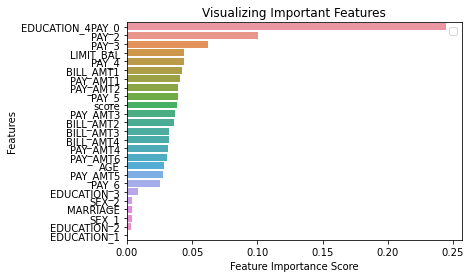

In [10]:
# loading feature_imp series
feature_imp = pd.Series(rf_best['model'].feature_importances_, index=features).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Learning curve

In [11]:
# Learning curve
def Learning_curve_model(X, Y, model, cv, train_sizes, scoring):

    plt.figure()
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(model, X, Y, cv=cv, scoring=scoring, n_jobs=-1,
                   train_sizes=train_sizes, return_times=True)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
                     
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'D:\\Users\\mario\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

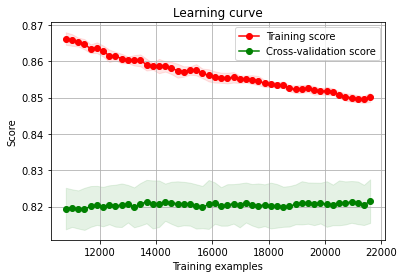

In [12]:
# kfold estratificado
cv_kfold_stratified = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

# train_size definition
train_size = np.linspace(0.5, 1.0, 50)

# defining score
scoring='accuracy'

# plot learning curve
Learning_curve_model(X_train, y_train, rf_best, cv_kfold_stratified, train_size, scoring)

# Model Scores

In [13]:
print('   Random Forest:')
print(20*'-')
print("Score Treino:", round(rf_best.score(X_train, y_train), 4)*100, "%")
print("Score Teste :", round(rf_best.score(X_test, y_test), 4)*100, "%")

   Random Forest:
--------------------
Score Treino: 84.65 %
Score Teste : 82.38 %


In [14]:
# mean accuracy is around 83% with standard deviation of the 5% using training dataset
scores = cross_val_score(rf_best, X_train, y_train, cv=10, scoring = "accuracy")
print('DataSet Treino:')
print(15*'-')
print("Scores Treino:", scores)
print("Mean Treino:", round(scores.mean(), 5)*100, "%")
print("Standard Deviation::", round(scores.std(), 5)*100, "%")

DataSet Treino:
---------------
Scores Treino: [0.82541667 0.82208333 0.81875    0.80791667 0.8175     0.8275
 0.8275     0.82208333 0.82958333 0.81      ]
Mean Treino: 82.083 %
Standard Deviation:: 0.699 %


# confusion matrix

In [15]:
# confusion matrix for training dataset
# 17823 credit cards were correctely classified as non default (True negative)
#   868 credit cards were incorrectely classified as non default (False positive)
#  3460 credit cards were incorrectely classified as default (False negative)
#  1849 credit cards were correctely classified as default (True positive)
predictions = cross_val_predict(rf_best, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[17823,   868],
       [ 3460,  1849]], dtype=int64)

# classification report + # precision, recall, f1

In [16]:
# Classification report
Y_pred_train = rf_best.predict(X_train)

Y_pred_train_probe = rf_best.predict_proba(X_train)

Y_pred_train_probe_1 = rf_best.predict_proba(X_train)[:,1] # todas linhas e somente a coluna 02 

print(classification_report(y_train, Y_pred_train_probe_1>=0.9))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     18691
           1       1.00      0.01      0.02      5309

    accuracy                           0.78     24000
   macro avg       0.89      0.50      0.45     24000
weighted avg       0.83      0.78      0.69     24000



In [17]:
# Values of precision, recall and f1_score
print("Precision:", precision_score(y_train, predictions))
print("Recall:", recall_score(y_train, predictions))
print("f1_score:", f1_score(y_train, predictions))

Precision: 0.68052999631947
Recall: 0.34827651158410244
f1_score: 0.4607525541988537


# curve auc-roc

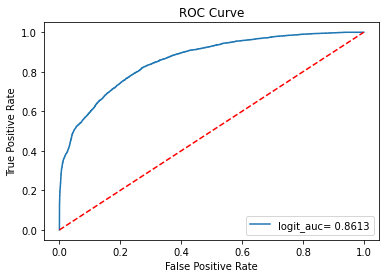

In [18]:
#plot da curva AUC-ROC
y_scores = rf_best.predict_proba(X_train)
y_scores = y_scores[:,1]

fpr,tpr,thresholds = roc_curve(y_train, y_scores)

logit_auc = roc_auc_score(y_train, y_scores)

plt.plot(fpr,tpr,label='logit_auc= %0.4f'%logit_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [19]:
# Auc roc measurement
logit_auc = round( roc_auc_score(y_train, y_scores) * 100, 2)
print("The ROC-AUC-Score of the Random Forest model is around {:.2f} %".format(logit_auc))

The ROC-AUC-Score of the Random Forest model is around 86.13 %


# threshold finding the best performance

In [20]:
scores = {}
y_scoretest = rf_best.predict_proba(X_test)[:,1]
for threshold in np.arange(0, 1, 0.01):
    # calculing odds and threshod
    y_binario = np.where(y_scoretest > threshold, 1, 0)
    # Measuring accuracy
    accuracy = accuracy_score(y_test, y_binario)
    # Saving threshold and accuracy
    scores[threshold] = accuracy

In [21]:
# Identifying the threshold that has the greatest accuracy
max_threshold = max(scores, key=scores.get)
max_threshold

0.47000000000000003

In [22]:
# testing accuracy for the greatest threshold 
test_accuracy = round( scores[max_threshold] * 100, 2)
print("Testing accuracy for the greatest threshold is {:.2f} %".format(test_accuracy))

Testing accuracy for the greatest threshold is 82.53 %


# SHAP Summary Plot 

In [23]:
model = RandomForestRegressor(max_depth=10, min_samples_split=4, n_estimators=300, random_state=123)

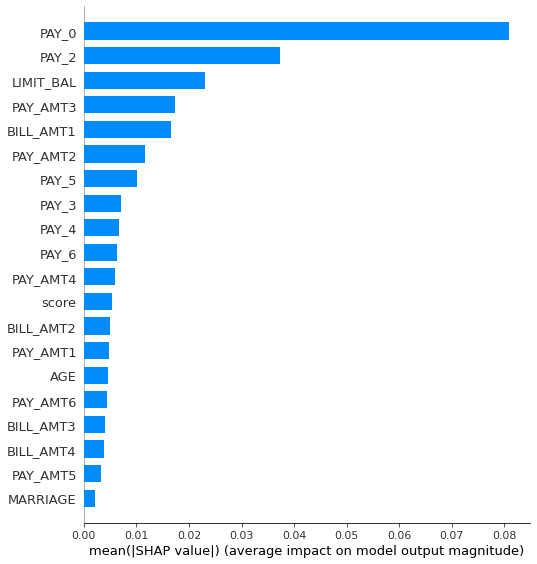

In [24]:
model.fit(X_train, y_train)
explainer =  shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [25]:
shap.initjs()

# SHAP individual analysis

In [29]:
# evaluating variables for a default credit card
shap.force_plot(explainer.expected_value, shap_values[16], X_train.iloc[16,:])

In [27]:
# evaluating variables for a non-default credit card
shap.force_plot(explainer.expected_value, shap_values[1000], X_train.iloc[1000,:])